In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as time

In [6]:
x_size = 100 + 2

dx = 0.01
dt = 0.0001

time_steps = 60/dt

airp1 = np.ones((x_size))
airp2 = np.ones((x_size))

velo1 = np.zeros((x_size))
velo2 = np.zeros((x_size))

sensor = np.zeros((x_size, 600))

In [7]:
def next_step(airp1, airp2, velo1, velo2, dx, dt):
    Rs = 287.1  # spezifische Gaskonstante
    T = 300     # Raumtemperatur
    v = 13.3e-6 # kinematische Viskosität
    for x in range(1, x_size-1):
        velo2[x] = velo1[x] + (v*dt/(dx**2)) * (velo1[x-1] + velo1[x+1] - 2*velo1[x])
        velo2[x] -= dt/dx * (airp1[x] - airp1[x-1]) / airp1[x] / Rs / T
        
        airp2[x] = airp1[x] + dt/dx * (airp1[x]*velo1[x] - airp1[x-1]*velo1[x-1])
    
    if x == x_size - 2:
        velo2[x] = 0

In [8]:
t = time()
airp1[51] = 1.1
for i in range(int(time_steps//2)):
    if i % 1000 == 0:
        sensor[:, i//1000] = airp1
    
    next_step(airp1, airp2, velo1, velo2, dx, dt)
    
    
    next_step(airp2, airp1, velo2, velo1, dx, dt)
    
    pass

C:\Users\NILSIR~1\AppData\Local\Temp/ipykernel_15072/2540984960.py:9: RuntimeWarning: overflow encountered in double_scalars
  airp2[x] = airp1[x] + dt/dx * (airp1[x]*velo1[x] - airp1[x-1]*velo1[x-1])
C:\Users\NILSIR~1\AppData\Local\Temp/ipykernel_15072/2540984960.py:7: RuntimeWarning: invalid value encountered in double_scalars
  velo2[x] -= dt/dx * (airp1[x] - airp1[x-1]) / airp1[x] / Rs / T


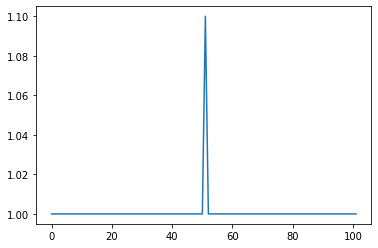

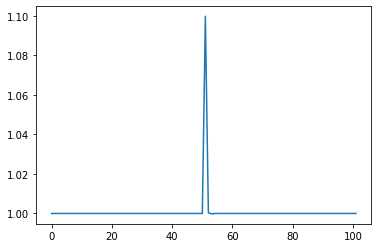

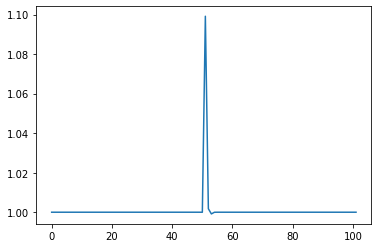

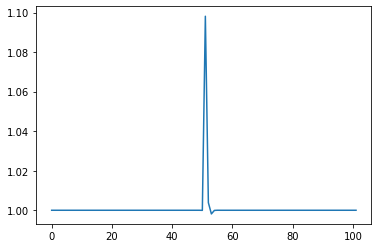

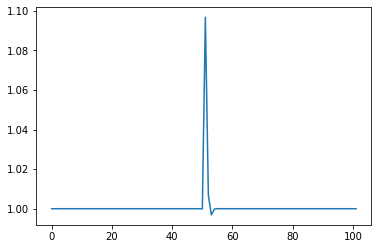

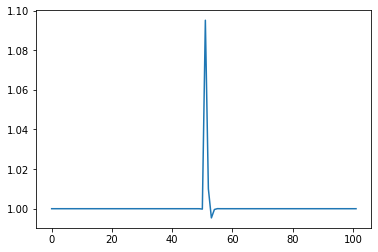

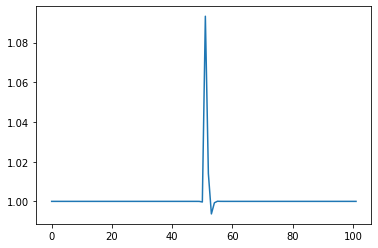

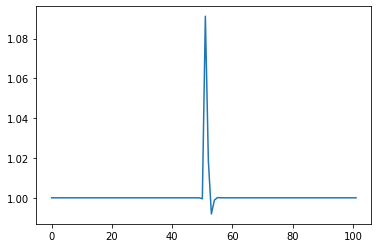

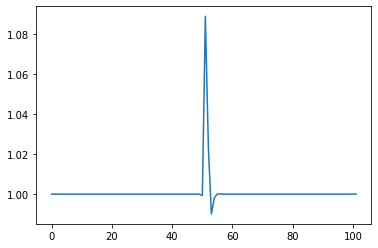

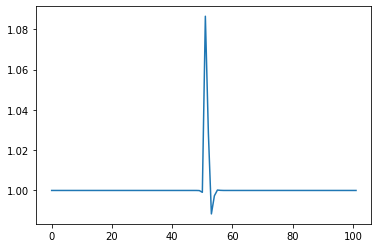

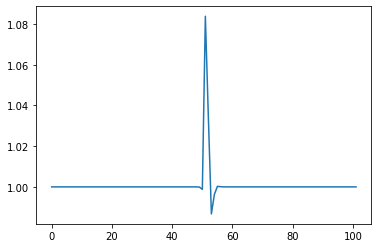

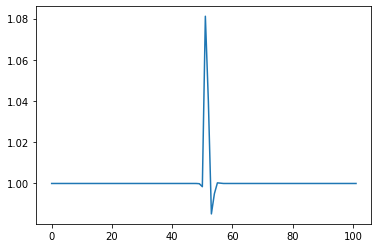

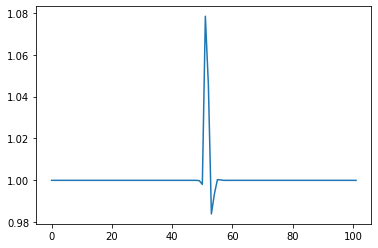

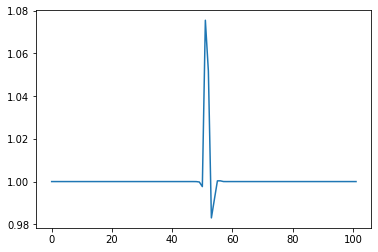

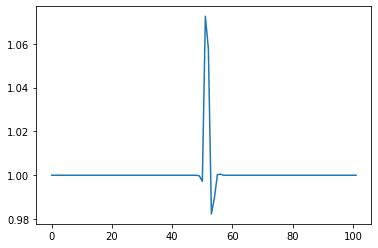

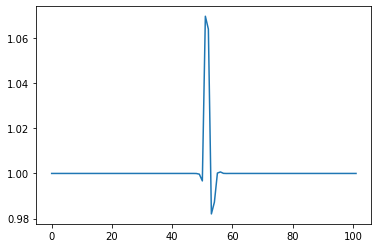

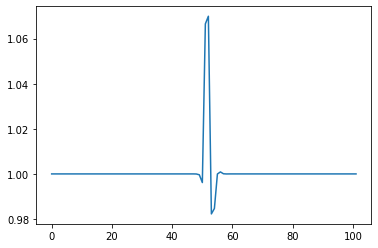

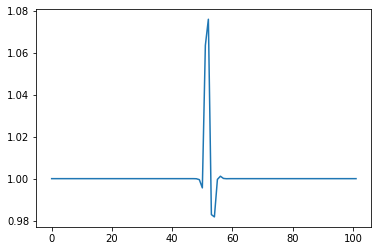

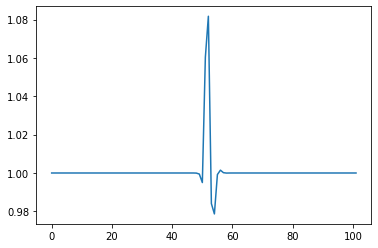

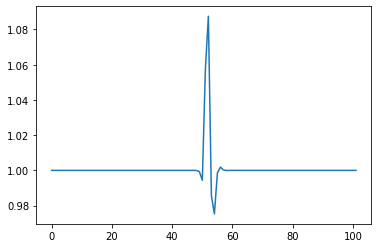

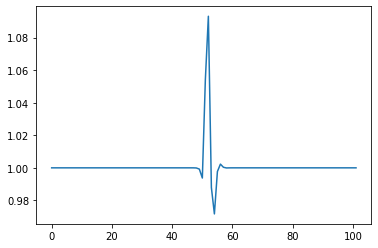

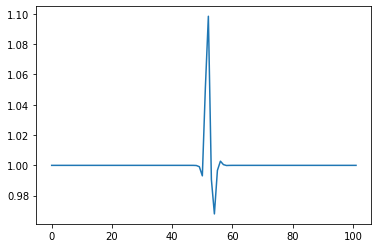

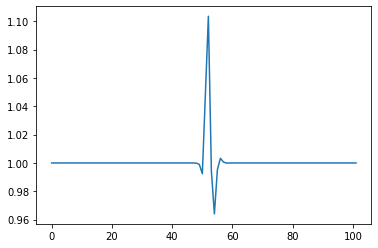

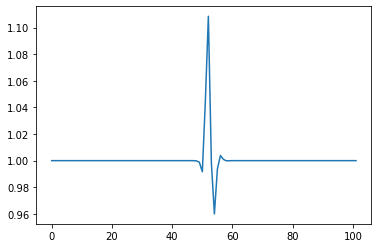

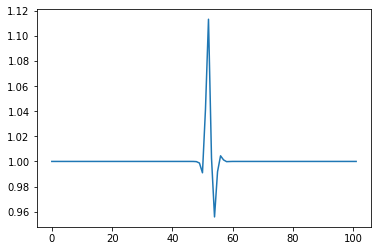

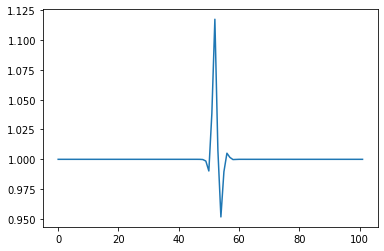

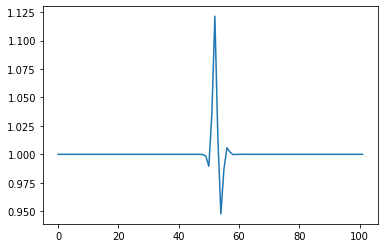

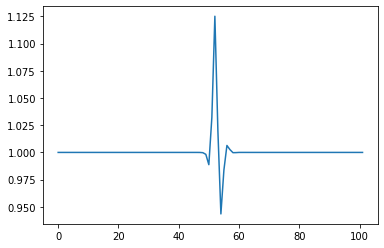

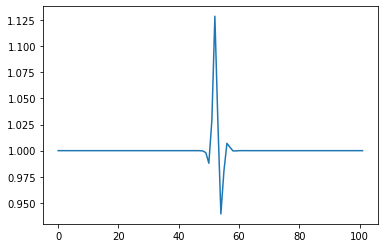

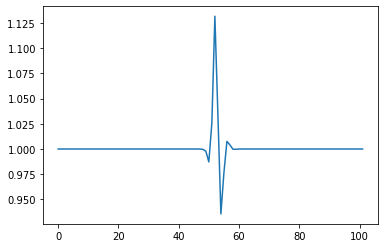

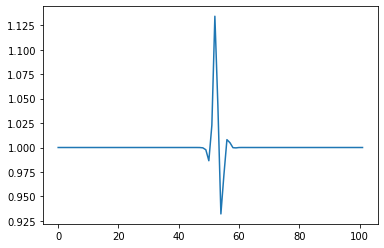

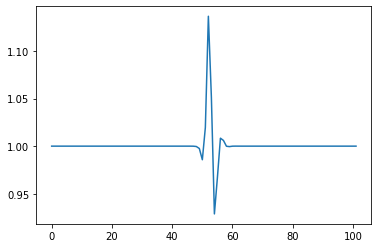

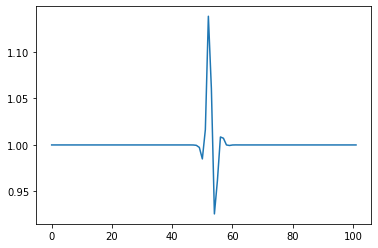

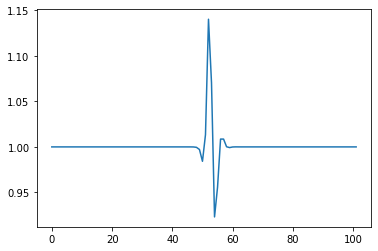

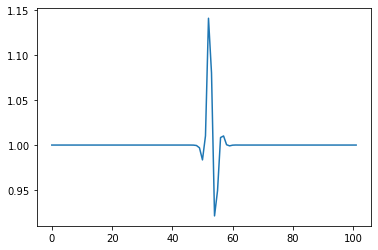

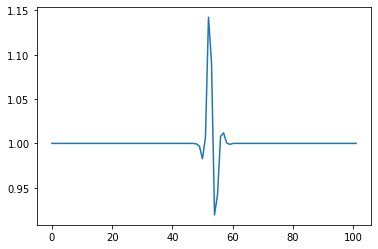

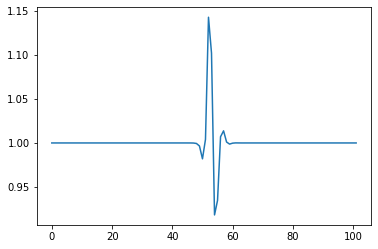

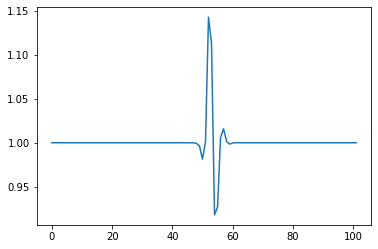

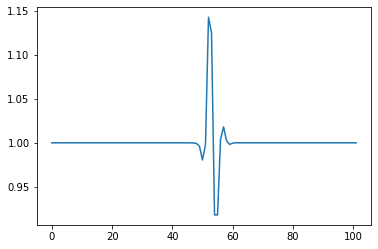

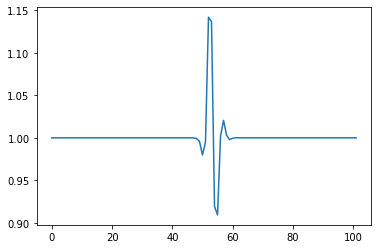

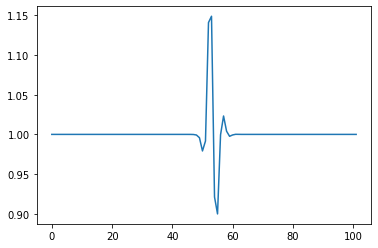

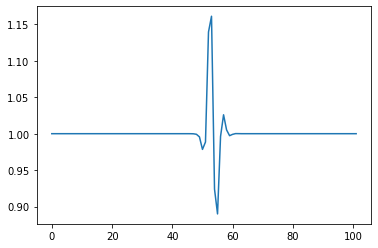

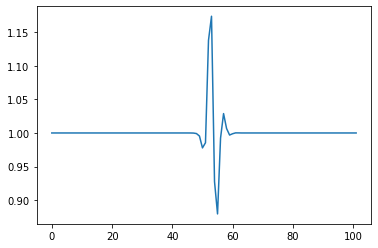

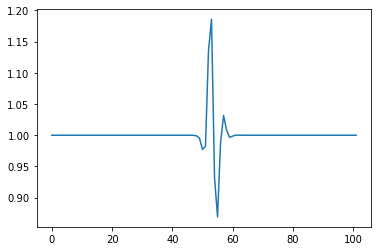

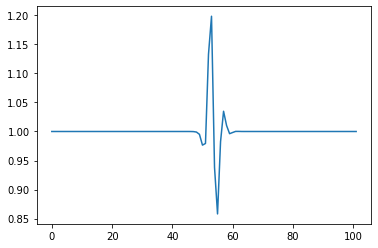

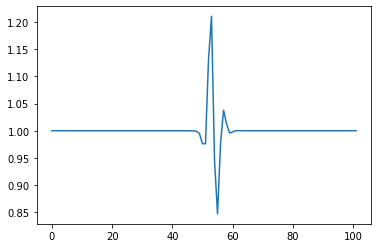

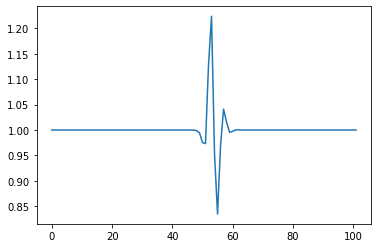

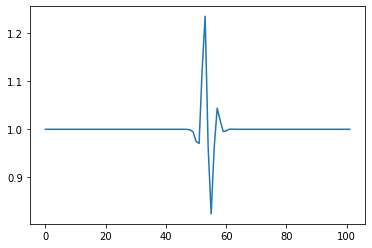

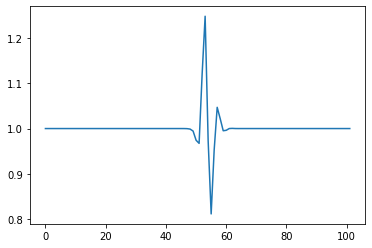

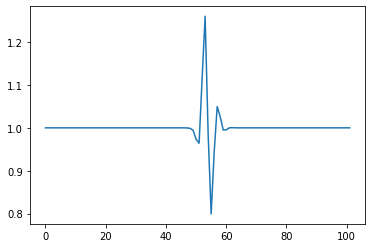

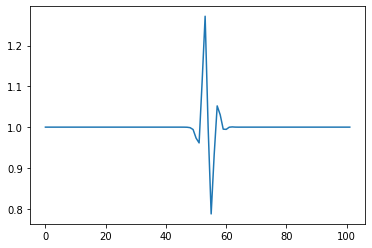

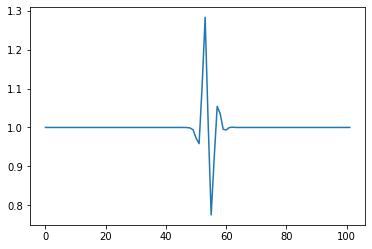

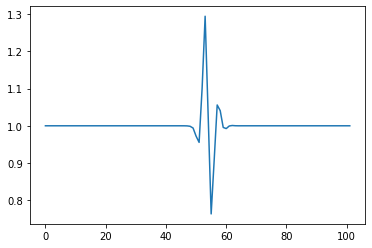

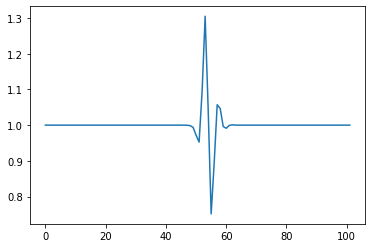

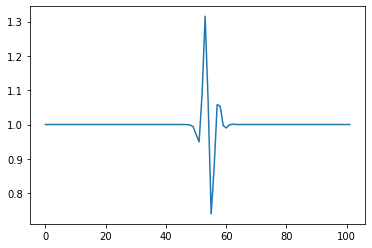

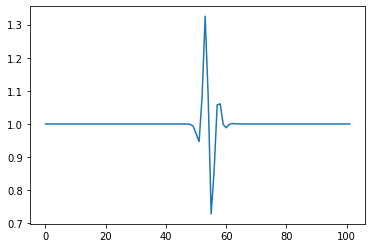

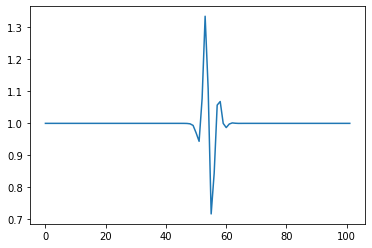

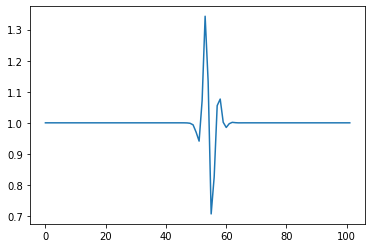

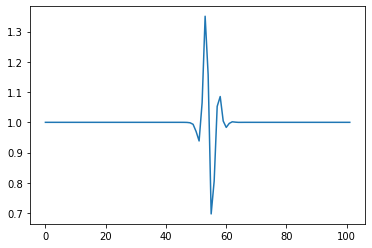

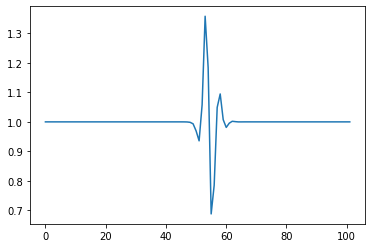

In [9]:
for i in range(60):
    plt.plot(sensor[:, i])
    plt.show()